# Employee Performance Analysis INX Future Inc
- Project Code:  10281

# Project Summary – Employee Performance Analysis at INX Future Inc

This project focuses on analyzing employee-related data to uncover patterns influencing performance within INX Future Inc. The dataset includes variables such as employee demographics, educational background, salary details, department, and performance metrics.

---
###  Data Overview
- The dataset was loaded and inspected using `pandas`, showing over 9,000 entries with 29+ columns.
- Summary statistics (`describe`) and data types were explored to understand numeric and categorical attributes.

---
### Data Cleaning
- Missing values were identified and visualized using a heatmap.
- Initial preprocessing included checking data completeness and formatting issues.

---
### Univariate Analysis
- **Numerical variables** like `Age`, `EmpHourlyRate`, and `YearsSinceLastPromotion` were analyzed using histograms and box plots.
  - Age was normally distributed with minor outliers.
  - Hourly rates showed some skewness and variation across employees.
- **Categorical features** like `EmpDepartment` and `EducationBackground` were explored with count plots and pie charts to understand employee distribution across departments.

---
### Bivariate Analysis
In the bivariate analysis phase, the relationships between pairs of variables were explored to understand how one factor may influence another—especially in relation to employee performance.

#### Key Insights:
- **Experience vs Salary Hike %**  
  A regression plot showed a weak correlation between total work experience and the percentage of the last salary hike. It suggests that more experience doesn’t always guarantee a higher hike.

- **Department vs Performance Rating**  
  A box plot visualized how performance ratings vary across departments. Some departments showed consistent performance, while others had more variation, possibly due to different roles or expectations.

- **Job Role vs Environment Satisfaction**  
  A grouped bar chart highlighted how environment satisfaction differs among job roles. Some roles had consistently higher satisfaction scores, which may influence performance.

- **Education Level vs Job Involvement**  
  Employees with higher educational backgrounds generally showed better job involvement levels, indicating that education may contribute to engagement.

- **Years Since Last Promotion vs Performance Rating**  
  Employees who hadn’t been promoted in a long time tended to have slightly lower performance ratings, suggesting that timely promotions could motivate better performance.

#### Visualization Techniques Used:
- Regression plots (`sns.regplot`)
- Box plots and count plots (`sns.boxplot`, `sns.countplot`)
- Cross-tabulations and grouped bar charts

These analyses helped to uncover meaningful two-way relationships between features that set the stage for model training and feature selection.

---
### Objective
The core aim of the analysis is to investigate how different factors like experience, department, promotions, education, and salary influence employee performance—laying the groundwork for predictive modeling and business recommendations.


# Data Overview
#### Understanding the structure of the dataset.

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8 (1).xls')
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [5]:
df.head() ## head() method returns the first 5 rows by default

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [6]:
## specifying number 
df.head(9)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
5,E1001011,27,Male,Life Sciences,Divorced,Development,Developer,Travel_Frequently,10,2,...,3,9,4,2,9,7,1,7,No,4
6,E1001016,50,Male,Marketing,Married,Sales,Sales Representative,Travel_Rarely,8,4,...,4,4,2,3,2,2,2,2,No,3
7,E1001019,28,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,2,...,4,10,4,3,7,7,3,7,Yes,3
8,E1001020,36,Female,Life Sciences,Married,Development,Developer,Non-Travel,8,3,...,1,10,2,3,8,7,0,5,No,3


In [7]:
df.tail() ## tail() returns the last 5 rows by default

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


In [8]:
# Checking for the number of missing (null) values in each column
df.isnull() 

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.describe() ## calculating the count,mean,standard deviationmin,max, and quartile values for numeric columns

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


##### TO get descriptive statistics for all columns (including non-numeric) I Use the include='all' parameter with describe().

In [10]:
df.describe(include = 'all')

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
count,1200,1200.000000,1200,1200,1200,1200,1200,1200,1200.000000,1200.00000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200,1200.000000
unique,1200,NaN,2,6,3,6,19,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,E1001000,NaN,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
freq,1,NaN,725,492,548,373,270,846,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1022,NaN
mean,NaN,36.918333,NaN,NaN,NaN,NaN,NaN,NaN,9.165833,2.89250,...,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,NaN,2.948333
std,NaN,9.087289,NaN,NaN,NaN,NaN,NaN,NaN,8.176636,1.04412,...,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,NaN,0.518866
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.00000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000
25%,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.00000,...,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,NaN,3.000000
50%,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,3.00000,...,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,NaN,3.000000
75%,NaN,43.000000,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,4.00000,...,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,NaN,3.000000


In [11]:
df.shape ## it gives(no.of rows,no.of columns)

(1200, 28)

### Identifying and visualizing missing data:

- Checking how many missing values are in each column.
- Visualizing missing data pattern.

<Axes: >

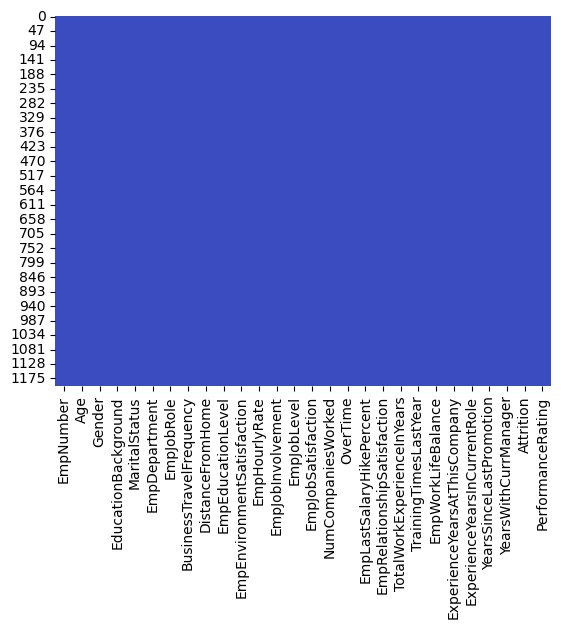

In [12]:
import seaborn as sns
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm')


### Univariate Analysis: Analyzing single features (distribution and outliers).

<Axes: xlabel='Age', ylabel='Count'>

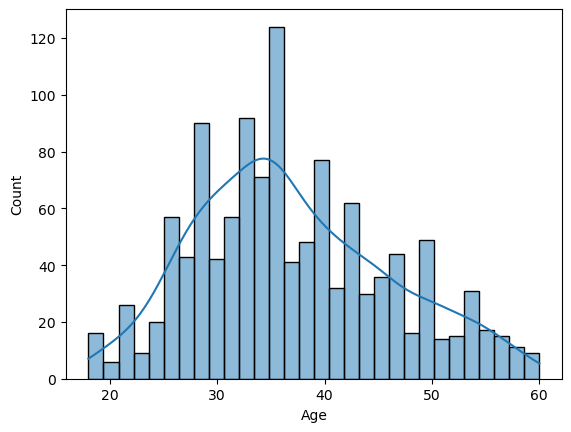

In [13]:
## using histogram Plots to show how employee ages are distributed in the data.
# Shows how employee ages are distributed across the company.
sns.histplot(data = df, x = 'Age', bins = 30,kde = True) ###This line creates a histogram of the Age column.

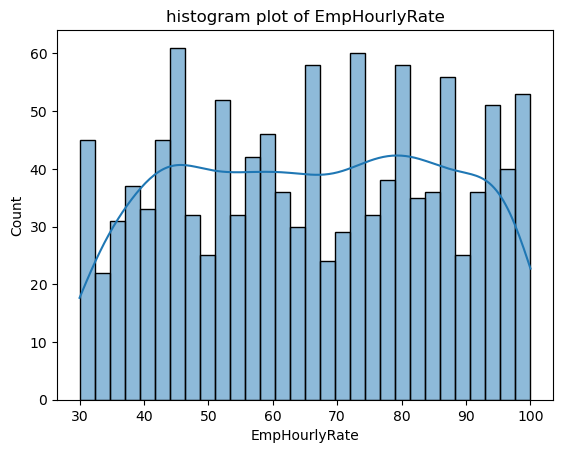

In [14]:
## histplot for EmpHourlyRate  
## Reveals how hourly salaries vary among employees.
import matplotlib.pyplot as plt
sns.histplot(data = df, x = 'EmpHourlyRate', bins = 30,kde = True)
plt.title('histogram plot of EmpHourlyRate')
plt.show()

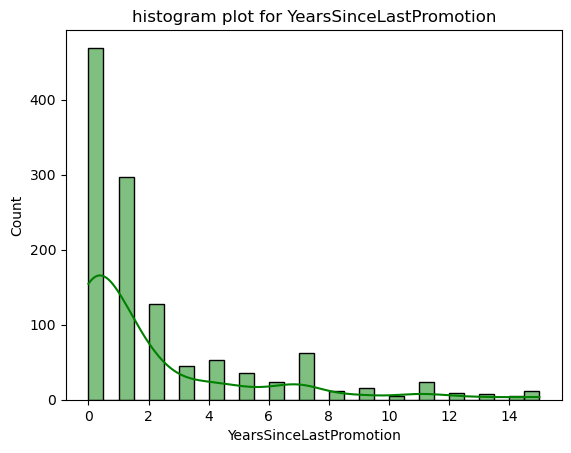

In [15]:
## histogram plot for YearsSinceLastPromotion
## Indicates how long it’s been since employees were last promoted
sns.histplot(data = df, x = 'YearsSinceLastPromotion', color = 'green', bins = 30,kde = True)
plt.title("histogram plot for YearsSinceLastPromotion")
plt.show()

<Axes: xlabel='EducationBackground', ylabel='count'>

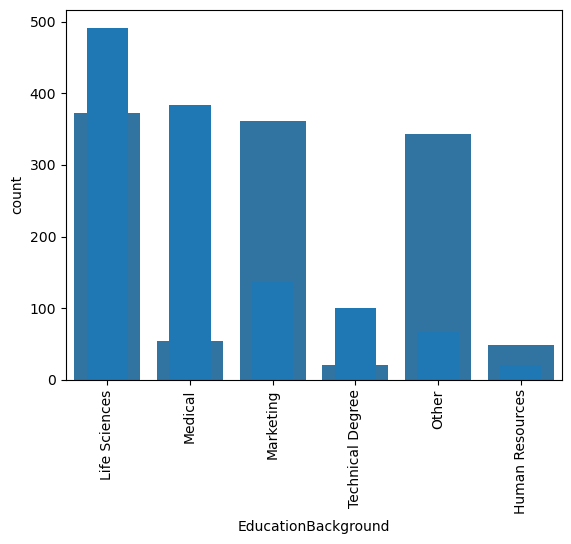

In [16]:
# For categorical
sns.countplot(x='EmpDepartment', data=df)
df['EducationBackground'].value_counts().plot(kind='bar') 
## df['EducationBackground'].value_counts() gives a series of frequencies of each education category.

###### Each bar shows how many employees belong to each department.

<Axes: ylabel='count'>

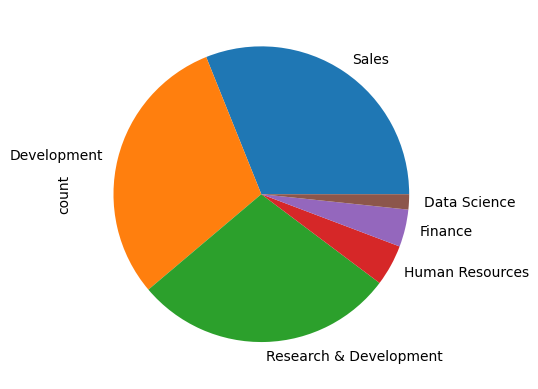

In [17]:
df['EmpDepartment'].value_counts().plot(kind='pie')

### It visually shows what percentage of total employees belong to each department.

### Univariate Analysis for EmpHourlyRate

<Axes: xlabel='EmpHourlyRate', ylabel='Count'>

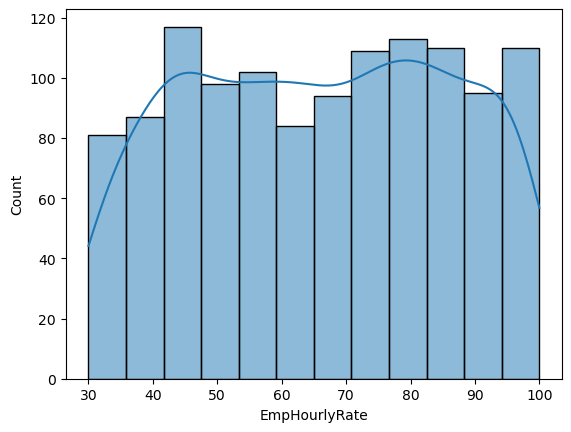

In [18]:
# Histogram
sns.histplot(df['EmpHourlyRate'], kde=True)

###### This plot gives a clear picture of how employee hourly rates are spread out. It shows whether most employees earn similar amounts or if there's a big difference in pay. It also helps spot if a few employees are earning much more or much less than the rest.

<Axes: xlabel='EmpHourlyRate'>

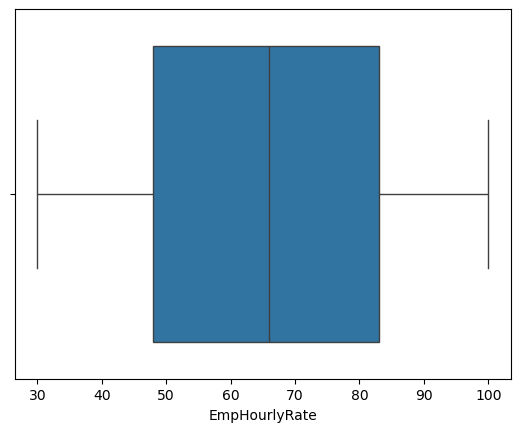

In [19]:
# Boxplot
sns.boxplot(x=df['EmpHourlyRate'])

###### This box plot shows how employee hourly rates are distributed and helps you quickly spot any unusual values. The box represents the middle range where most employees fall, while the lines (whiskers) show the overall spread. Any dots outside the whiskers are outliers — employees who are earning much more or less than the typical range.

In [20]:
# Summary statistics
df['EmpHourlyRate'].describe()


count    1200.000000
mean       65.981667
std        20.211302
min        30.000000
25%        48.000000
50%        66.000000
75%        83.000000
max       100.000000
Name: EmpHourlyRate, dtype: float64

## Bivariate Analysis:
- Understanding relationship between two variables (especially with the target variable)

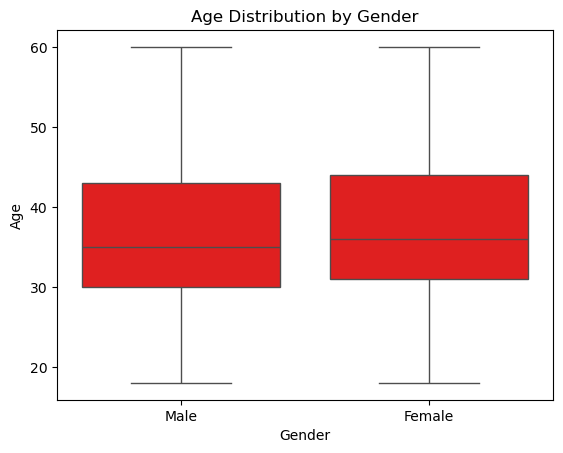

In [21]:
# comparing the distribution of Age for each Gender category using boxplot
sns.boxplot(x='Gender', y='Age', data=df, color = 'red')
plt.title('Age Distribution by Gender')
plt.show()

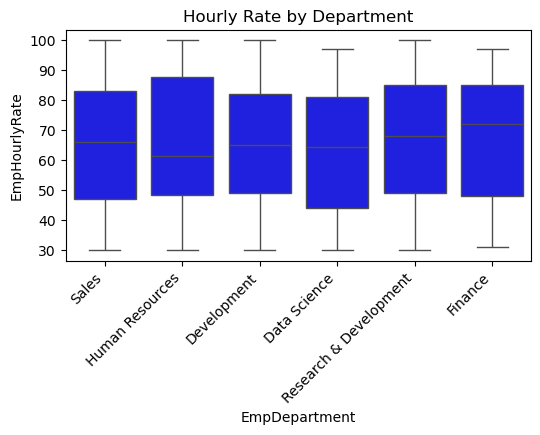

In [22]:
## comparing the distribution of hourly pay (EmpHourlyRate) across different departments (EmpDepartment) in the company.
plt.figure(figsize=(6,3))
sns.boxplot(x='EmpDepartment', y='EmpHourlyRate', color = 'blue', data=df)
plt.title('Hourly Rate by Department')
plt.xticks(rotation=45, ha='right') ###Helps prevent label overlap when category names are long
plt.show()

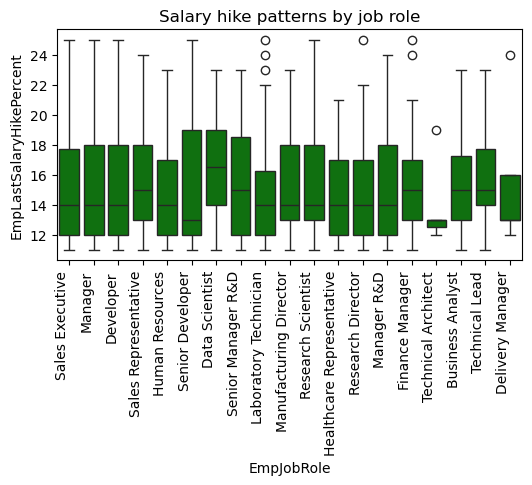

In [23]:
plt.figure(figsize=(6,3))
sns.boxplot(x='EmpJobRole', y='EmpLastSalaryHikePercent', color = 'green', data=df)
plt.title('Salary hike patterns by job role')
plt.xticks(rotation=90, ha='right') ###Helps prevent label overlap when category names are long
plt.show()

#### In the Salary hike patterns by job role visual the box plot allows for a quick and insightful comparison of salary hike patterns across various job roles, highlighting central tendencies, data spread, and identifying unusual hike percentages.

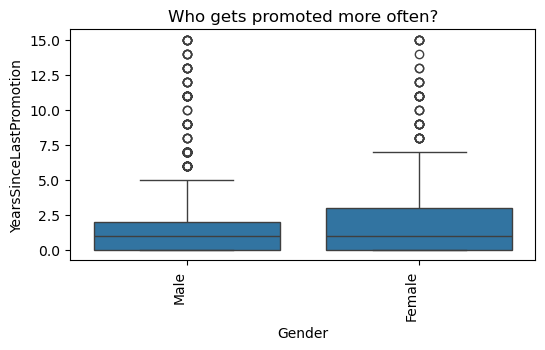

In [24]:
## Who gets promoted more often?
plt.figure(figsize=(6,3))
sns.boxplot(x='Gender', y='YearsSinceLastPromotion', data=df)
plt.title('Who gets promoted more often?')
plt.xticks(rotation=90, ha='right') ###Helps prevent label overlap when category names are long
plt.show()

### In above visual the box plot suggests that in this dataset, females on average, tend to get promoted slightly more often than males, and their promotion frequency is also more consistent than that of males.

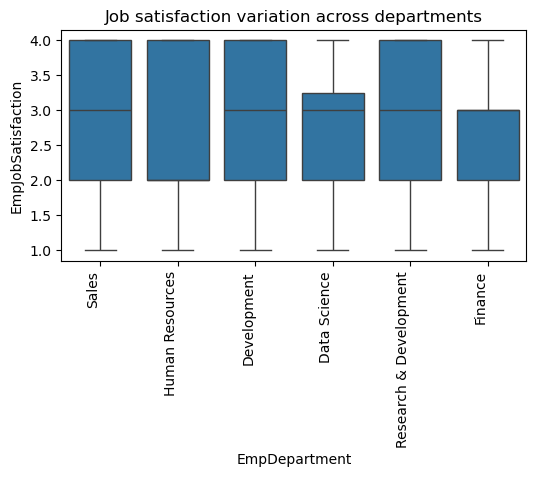

In [25]:
##### Job satisfaction variation across departments
plt.figure(figsize=(6,3))
sns.boxplot(x='EmpDepartment', y='EmpJobSatisfaction', data=df)
plt.title('Job satisfaction variation across departments')
plt.xticks(rotation=90, ha='right')
plt.show()

#### here in the Job satisfaction variation across departments visual the box plot visualizes how employee job satisfaction varies across different departments. Each department is represented by a box and whiskers, providing a summary of the distribution of job satisfaction scores within that department.

### Department wise performance study

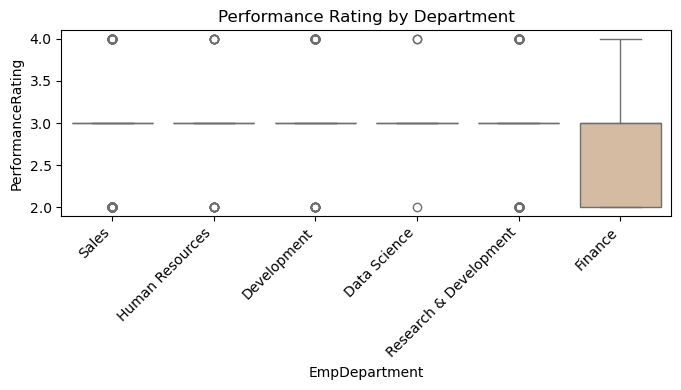

In [26]:
###### Performance Rating Spread by Department using boxplot
plt.figure(figsize=(7,4))
sns.boxplot(x='EmpDepartment', y='PerformanceRating', hue='EmpDepartment', data=df, palette='pastel')
plt.title('Performance Rating by Department')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### This box plot gives a clear picture of how employee performance ratings vary across different departments in the organization.
- The line inside each box shows the median rating — basically the most typical score in that department.
- The size of the box and the lines (whiskers) stretching out from it show how consistent or spread out the ratings are. A shorter box means most employees in that department have similar ratings, while a longer one means there's more variation.
- If you see any dots beyond the whiskers, those are outliers — employees whose performance ratings are either much higher or lower than the rest in their department.

<Axes: xlabel='PerformanceRating', ylabel='EmpHourlyRate'>

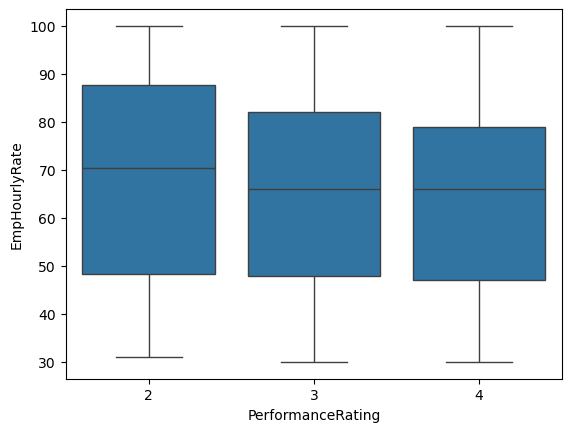

In [27]:
sns.boxplot(x='PerformanceRating', y='EmpHourlyRate', data=df)

## This plot helps you compare how hourly pay varies across performance ratings.

- If boxes for higher ratings are generally higher up, it means better-performing employees earn more.
- If boxes overlap a lot or the median lines are similar, it means hourly pay doesn’t change much with performance.
- If one rating group has many outliers, it could suggest salary inconsistency in that group.

### Showing relationship between TotalWorkExperience and SalaryHikePercent


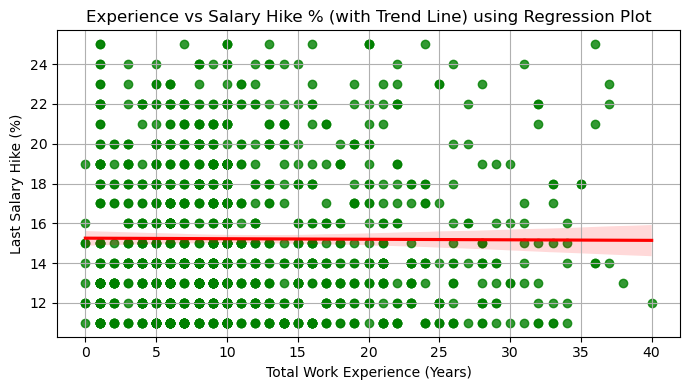

In [28]:
plt.figure(figsize=(7,4))
sns.regplot(x='TotalWorkExperienceInYears', y='EmpLastSalaryHikePercent', data=df, scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.title("Experience vs Salary Hike % (with Trend Line) using Regression Plot")
plt.xlabel("Total Work Experience (Years)")
plt.ylabel("Last Salary Hike (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

#### The plot suggests that there's no strong positive or negative relationship between total work experience and salary hike percentage. Most of the data points are spread out horizontally, and the red trend line is almost flat. This means that employees with more years of experience don’t necessarily get higher salary hikes.

 ## Correlation Analysis
- dentify linear relationships between numerical variables.


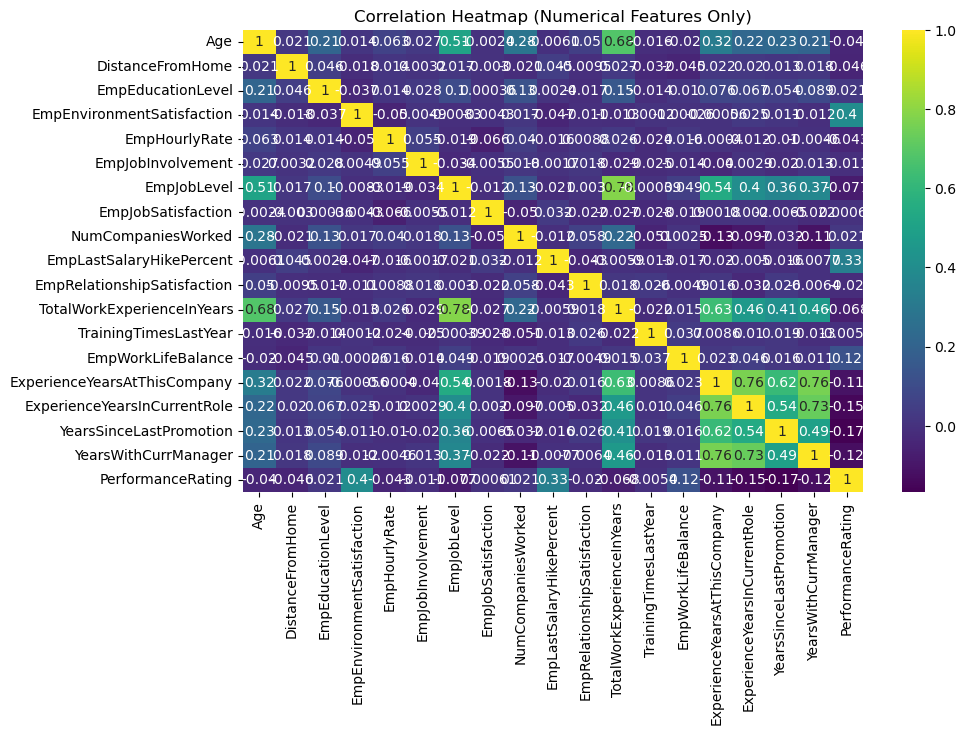

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='viridis')
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()

#### This heatmap gives you a quick overview of how strongly the numeric features in the dataset are related to each other.
- Each box represents the correlation between two variables. The darker colors (purples/blues) show weak or negative relationships, and the brighter yellow/greenish colors show strong positive relationships.
- A value close to +1 means the two features increase together (strong positive relationship).
- A value close to -1 means when one increases, the other decreases (strong negative relationship).
- A value close to 0 means there’s no real relationship between them.

In [30]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlations = correlation_matrix['PerformanceRating'].sort_values(ascending=False)
print(correlations)

PerformanceRating               1.000000
EmpEnvironmentSatisfaction      0.395561
EmpLastSalaryHikePercent        0.333722
EmpWorkLifeBalance              0.124429
NumCompaniesWorked              0.020980
EmpEducationLevel               0.020529
EmpJobSatisfaction              0.000606
TrainingTimesLastYear          -0.005443
EmpJobInvolvement              -0.010539
EmpRelationshipSatisfaction    -0.019502
Age                            -0.040164
EmpHourlyRate                  -0.043116
DistanceFromHome               -0.046142
TotalWorkExperienceInYears     -0.068141
EmpJobLevel                    -0.076632
ExperienceYearsAtThisCompany   -0.111645
YearsWithCurrManager           -0.122313
ExperienceYearsInCurrentRole   -0.147638
YearsSinceLastPromotion        -0.167629
Name: PerformanceRating, dtype: float64


### Correlation of Numerical Features with Performance Rating

To better understand which numeric features individually correlate with the employee performance rating, we calculated the correlation of each numerical feature with the target variable.

This helps in identifying features that have a direct linear relationship (positive or negative) with performance.


## Department wise performances

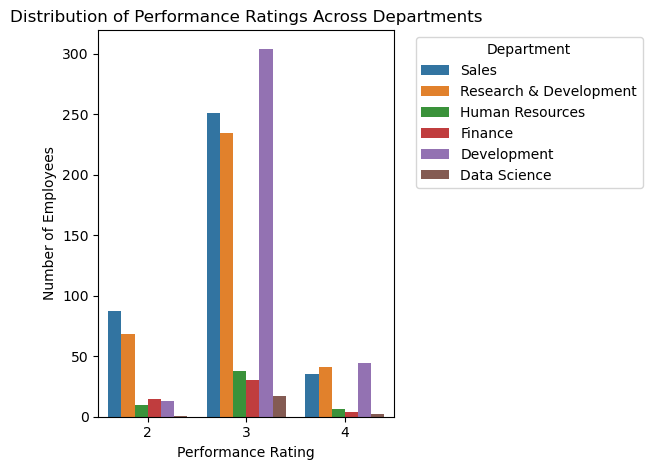

In [31]:
sns.countplot(x='PerformanceRating', hue='EmpDepartment', data=df)
plt.title("Distribution of Performance Ratings Across Departments")
plt.xlabel("Performance Rating")
plt.ylabel("Number of Employees")
plt.legend(title="Department", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- The x-axis shows the performance ratings (like 1, 2, 3, 4).
- Each bar is split by department, using different colors.
- The height of each colored segment shows how many employees in that department received that particular rating.

### Department-wise Performance Analysis
This chart shows how performance ratings are distributed across departments.

- Most employees across all departments have a performance rating of 3, indicating average performance.
- Sales and R&D have the highest number of employees in this category.
- Very few employees received a rating of 2 or 4, showing that low and high performance are less frequent in the dataset.
- Among the departments, Sales has the largest number of employees overall, while others like Data Science and Finance have smaller teams.

This analysis helps understand which departments have more average vs top performers and where improvement efforts can be focused.


### Department-wise Performance Rating Distribution (Proportional View)

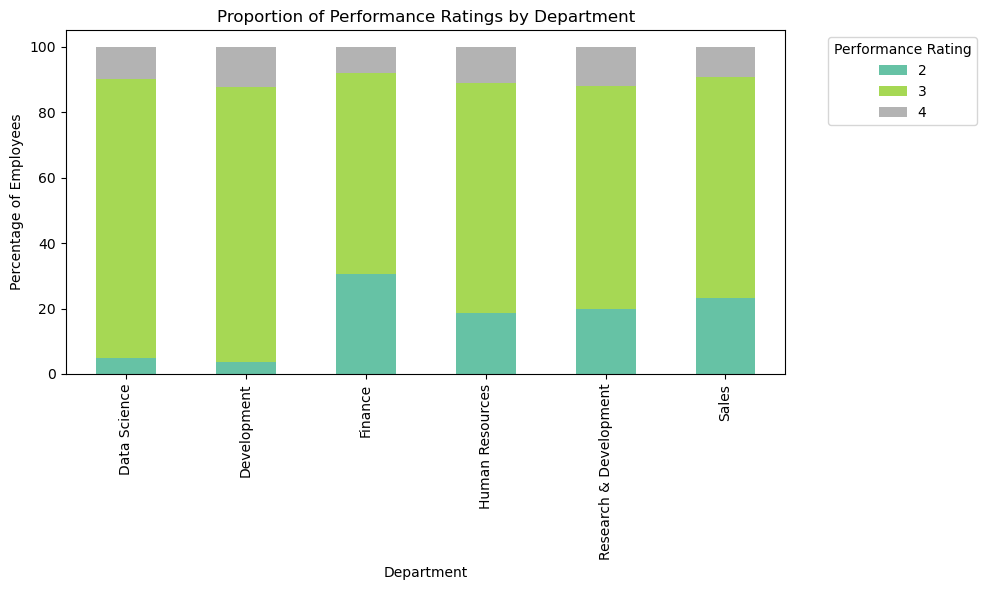

In [32]:
dept_rating = pd.crosstab(df['EmpDepartment'], df['PerformanceRating'], normalize='index') * 100
dept_rating.plot(kind='bar', stacked=True, colormap='Set2', figsize=(10,6))
plt.title("Proportion of Performance Ratings by Department")
plt.xlabel("Department")
plt.ylabel("Percentage of Employees")
plt.legend(title="Performance Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Department-wise Performance Rating (Percentage View)

This chart displays the percentage of employees in each department based on their performance ratings (2, 3, or 4).
- **Rating 3** dominates across all departments, indicating that most employees are average performers.
- **Rating 2** has a slightly higher share in some departments such as **Sales, HR, R&D, and Finance**, suggesting potential areas for performance improvement.
- **Rating 4** is consistently the smallest across departments, showing a general lack of top-tier performance.

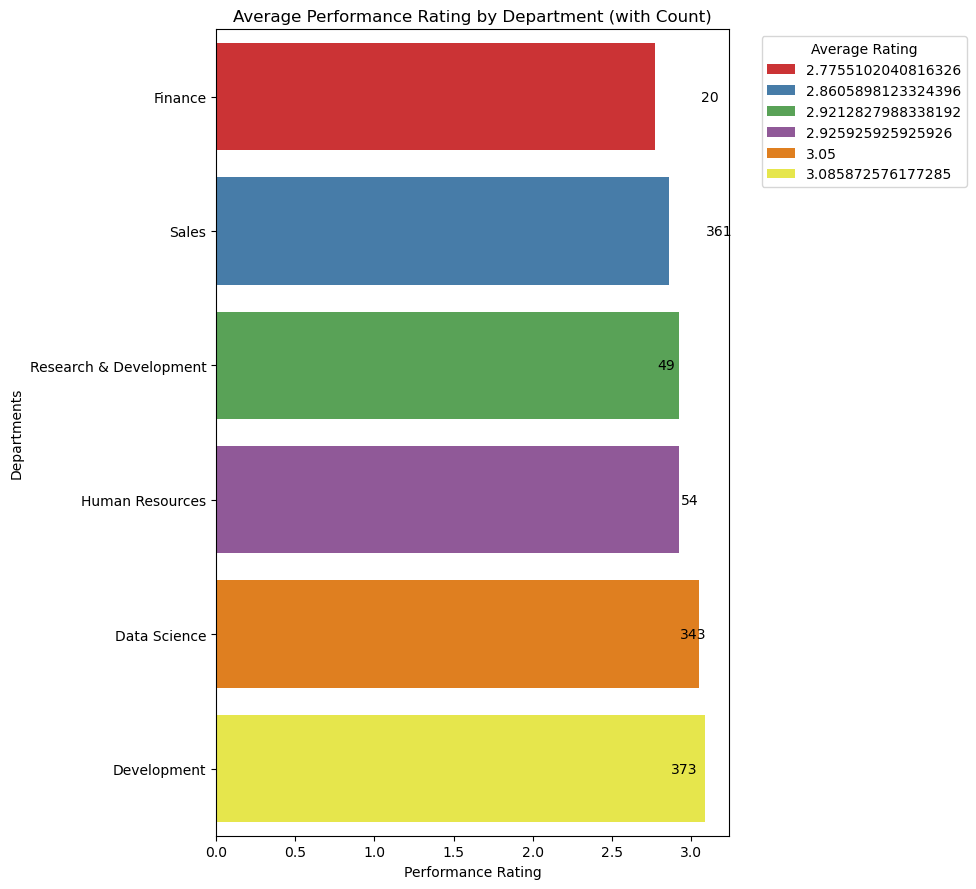

In [33]:
dept_grouped = df.groupby('EmpDepartment').agg(
    PerformanceRating=('PerformanceRating', 'mean'),
    Count=('PerformanceRating', 'count')
).reset_index().sort_values('PerformanceRating', ascending=True)
plt.figure(figsize=(10, 9))
sns.barplot(data=dept_grouped, x='PerformanceRating', y='EmpDepartment', hue='PerformanceRating', palette='Set1')
# Adding text labels for count
for index, row in dept_grouped.iterrows():
    plt.text(row['PerformanceRating'] + 0.01, index, f"{row['Count']}", va='center')
# Customize axes and title
plt.xlabel("Performance Rating")
plt.ylabel("Departments")
plt.title("Average Performance Rating by Department (with Count)")
plt.legend(title="Average Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Average Performance Rating by Department (with Count)

This bar chart shows the **average performance rating** of employees in each department, providing a clear view of how different departments are performing overall.

#### Key Insights:
- Departments are sorted in **ascending order of average performance**, making it easier to identify lower- and higher-performing teams.
- Each bar represents the **mean performance rating** for that department.
- The **numbers next to each bar** indicate how many employees belong to that department, giving context to the average rating.
- This chart is especially useful to:
  - Identify departments that consistently perform better on average.
  - Pinpoint departments where performance ratings are lower and may require managerial attention or development programs.

By combining average scores with employee counts, this visual offers a **balanced view** of departmental performance in both quality and size.


##  Department-wise Performance Analysis

To deeply understand how employee performance varies across departments, we used three different visualizations:
1. **Proportion of Performance Ratings by Department** – Shows rating composition within each department.
2. **Distribution of Ratings Across Departments** – Shows how each department contributes to each rating level.
3. **Average Performance Rating by Department (with Count)** – Shows overall average performance and employee count for each department.
These perspectives help identify consistently high- or low-performing departments and guide improvement efforts accordingly.

###  Understanding Differences in Department-wise Performance Visuals
We used three different charts to analyze performance by department. While they are all related, they show different views:

- **Proportion Chart** shows what percent of employees in each department got ratings 2, 3, or 4.
- **Distribution Chart** shows how many employees from each department fall under each rating.
- **Average Rating Chart** shows the overall average performance score for each department.

**  We noticed that departments like **HR** and **Data Science** have a **high average rating**, but they appear lower in the other charts.
This is because these departments have **fewer employees**, and even a few high ratings can raise their average.  
On the other hand, larger departments like **Sales** may have more average performers, leading to lower average ratings but higher counts.

# Feature Engineering / Feature Selection

### checking dataframe columns and their types:

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

# **Encoding Categorical Variables**

In [35]:
# Separate categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical Columns:", categorical_cols.tolist())
# One-hot encode them
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

Categorical Columns: ['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']


## **Scaling Numerical Features (for PCA / other models)**

In [36]:
from sklearn.preprocessing import StandardScaler
# Selecting only numeric columns (after encoding)
numeric_cols = df_encoded.select_dtypes(include='number').columns
# Scaling them
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded[numeric_cols]), columns=numeric_cols)
df_scaled

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,-0.541458,0.102061,0.103000,1.177978,-0.543569,0.379608,-0.060955,1.151824,-0.674538,-0.889111,1.185833,-0.170645,-0.622235,-1.064491,0.468778,0.749766,-0.681372,1.100251,0.099618
1,1.109888,0.591464,1.061145,1.177978,-1.187042,0.379608,-0.060955,-1.574386,-0.269410,-0.889111,1.185833,1.112397,-0.622235,0.365956,-0.012431,0.749766,-0.370834,0.817773,0.099618
2,0.339260,-0.509693,1.061145,1.177978,-0.890055,-1.035081,0.842082,-1.574386,0.945974,1.594054,0.255768,1.112397,-0.622235,0.365956,1.752001,2.410786,-0.370834,2.230163,2.027702
3,0.449349,0.102061,1.061145,-0.656641,0.347393,-1.035081,2.648157,1.151824,0.135718,-0.061389,-0.674297,1.497310,-0.622235,-1.064491,2.233210,0.472929,3.045084,0.535296,0.099618
4,2.541054,0.836165,1.061145,-1.573950,0.891870,0.379608,-0.060955,-1.574386,2.161359,-0.337297,1.185833,-0.170645,-1.414051,0.365956,-0.814446,-0.634417,-0.060296,-0.594616,0.099618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-1.091906,-0.754394,-1.813288,1.177978,0.248397,1.794297,-0.060955,1.151824,-0.674538,1.318147,-0.674297,-0.683861,0.169581,0.365956,-0.172834,0.196093,-0.681372,-0.029660,2.027702
1196,0.008991,0.102061,-0.855144,1.177978,0.693878,1.794297,-0.963992,1.151824,0.135718,0.490425,-1.604362,-0.940470,-0.622235,0.365956,-0.974849,-1.188091,-0.681372,-1.159572,0.099618
1197,1.440157,2.304373,-1.813288,1.177978,0.396891,1.794297,-0.963992,0.243087,-0.674538,-1.165018,0.255768,1.112397,0.169581,0.365956,2.072807,1.026603,0.250242,1.100251,0.099618
1198,-0.321278,-0.020290,0.103000,1.177978,-0.989050,-1.035081,0.842082,-0.665650,-0.674538,-0.337297,-0.674297,-0.298949,0.169581,1.796403,0.147972,0.749766,1.492394,0.817773,0.099618


We applied standard scaling to all numerical features in the dataset. This process transforms each numeric column so that:
- The mean becomes 0
- The standard deviation becomes 1
This ensures that all features are on the same scale, which is especially important when performing dimensionality reduction (like PCA) or using algorithms that are sensitive to feature magnitude (e.g., KNN, SVM).

By scaling the data, we make sure that no single feature dominates the model just because it has larger numeric values.

## Dimensionality Reduction (PCA)

###### Reducing the dimensionality to visualize or check which components carry most of the information.

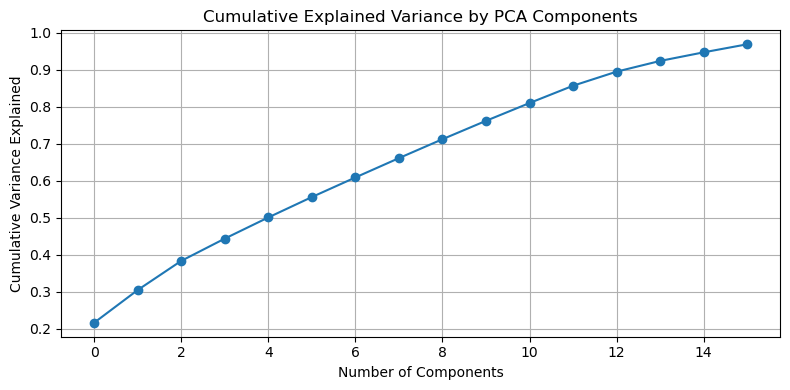

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
## Applying PCA (keep 95% of variance)
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(df_scaled)
#Plot for explained variance ratio
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.tight_layout()
plt.show()

### Dimensionality Reduction using PCA
This plot shows the **Cumulative Explained Variance by PCA Components**.
- The **x-axis** represents the number of principal components retained.
- The **y-axis** shows the cumulative percentage of the dataset’s total variance explained by those components.

**Why this matters:**
- PCA (Principal Component Analysis) helps reduce the dimensionality of the dataset while preserving most of the important information (variance).
- From the plot, we can see that approximately **12 components** are enough to retain **95% of the total variance**.
- This allows us to simplify the dataset without losing much information, which improves model efficiency and reduces noise.

##### We use this to:
- Speed up model training
- Avoid overfitting
- Visualize and interpret high-dimensional data effectively


In [38]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded[numeric_cols]), columns=numeric_cols)
df_scaled

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,-0.541458,0.102061,0.103000,1.177978,-0.543569,0.379608,-0.060955,1.151824,-0.674538,-0.889111,1.185833,-0.170645,-0.622235,-1.064491,0.468778,0.749766,-0.681372,1.100251,0.099618
1,1.109888,0.591464,1.061145,1.177978,-1.187042,0.379608,-0.060955,-1.574386,-0.269410,-0.889111,1.185833,1.112397,-0.622235,0.365956,-0.012431,0.749766,-0.370834,0.817773,0.099618
2,0.339260,-0.509693,1.061145,1.177978,-0.890055,-1.035081,0.842082,-1.574386,0.945974,1.594054,0.255768,1.112397,-0.622235,0.365956,1.752001,2.410786,-0.370834,2.230163,2.027702
3,0.449349,0.102061,1.061145,-0.656641,0.347393,-1.035081,2.648157,1.151824,0.135718,-0.061389,-0.674297,1.497310,-0.622235,-1.064491,2.233210,0.472929,3.045084,0.535296,0.099618
4,2.541054,0.836165,1.061145,-1.573950,0.891870,0.379608,-0.060955,-1.574386,2.161359,-0.337297,1.185833,-0.170645,-1.414051,0.365956,-0.814446,-0.634417,-0.060296,-0.594616,0.099618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-1.091906,-0.754394,-1.813288,1.177978,0.248397,1.794297,-0.060955,1.151824,-0.674538,1.318147,-0.674297,-0.683861,0.169581,0.365956,-0.172834,0.196093,-0.681372,-0.029660,2.027702
1196,0.008991,0.102061,-0.855144,1.177978,0.693878,1.794297,-0.963992,1.151824,0.135718,0.490425,-1.604362,-0.940470,-0.622235,0.365956,-0.974849,-1.188091,-0.681372,-1.159572,0.099618
1197,1.440157,2.304373,-1.813288,1.177978,0.396891,1.794297,-0.963992,0.243087,-0.674538,-1.165018,0.255768,1.112397,0.169581,0.365956,2.072807,1.026603,0.250242,1.100251,0.099618
1198,-0.321278,-0.020290,0.103000,1.177978,-0.989050,-1.035081,0.842082,-0.665650,-0.674538,-0.337297,-0.674297,-0.298949,0.169581,1.796403,0.147972,0.749766,1.492394,0.817773,0.099618


### Feature Scaling with StandardScaler

To prepare the data for dimensionality reduction and modeling, I applied **Standard Scaling** to all numerical features.

- This process transforms each feature so that it has a **mean of 0** and **standard deviation of 1**.
- Scaling ensures that all features contribute equally to the model, especially important for algorithms like **PCA**, **KNN**, or **SVM**.
- I applied scaling only to numerical columns in the dataset, resulting in a clean, scaled dataset (`df_scaled`) ready for PCA and model training.


### Feature Selection
I selected features based on domain knowledge and initial data exploration. Columns like `EmpHourlyRate`, `TotalWorkExperienceInYears`, `YearsAtCompany`, and `EmpDepartment` were kept because they are likely to influence employee performance.

I also used a correlation heatmap to check relationships between numerical features. Since there were no highly correlated pairs, I decided to keep all numeric columns at this stage.


# Model Building (Training)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
X = df_encoded.drop('PerformanceRating', axis=1)
y = df_encoded['PerformanceRating']

###### Separating the dataset into features (X) and target variable (y)
###### 'PerformanceRating' is the target we want to predict, so we drop it from the feature set

In [41]:
###Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
## training the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

###  Why I Used Random Forest Classifier

For this project, I chose the **Random Forest Classifier** because it is well-suited for classification problems like predicting employee performance ratings.

Here’s why it fits our needs:

- It works well with both **numerical and categorical data** (after encoding).
- It does **not require feature scaling**, which simplifies preprocessing.
- It’s known for being **accurate, robust, and less prone to overfitting** because it builds multiple decision trees and combines their results.
- One of its key advantages is that it provides **feature importance scores**, which helps us identify the **top factors influencing performance** — a core goal of this analysis.
- Lastly, it's easy to use and interpret, making it a strong choice for practical business applications like this.

Overall, Random Forest gives us a good balance of performance, explainability, and simplicity.


In [43]:
##Making predictions and evaluating
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           2       0.95      0.62      0.75        29
           3       0.83      0.99      0.90       184
           4       0.00      0.00      0.00        27

    accuracy                           0.84       240
   macro avg       0.59      0.54      0.55       240
weighted avg       0.75      0.84      0.78       240

Confusion Matrix:
 [[ 18  11   0]
 [  1 183   0]
 [  0  27   0]]


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=0)) ##Using the zero_division=0 parameter to avoid the warning:

              precision    recall  f1-score   support

           2       0.95      0.62      0.75        29
           3       0.83      0.99      0.90       184
           4       0.00      0.00      0.00        27

    accuracy                           0.84       240
   macro avg       0.59      0.54      0.55       240
weighted avg       0.75      0.84      0.78       240



In [45]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[ 18  11   0]
 [  1 183   0]
 [  0  27   0]]


## To check what the model is predicting:

In [46]:
print("Predicted values:", y_pred[:10])  # first 10 predictions
print("Actual values   :", y_test.values[:10])

Predicted values: [3 2 3 3 3 3 3 3 3 3]
Actual values   : [3 2 3 3 3 3 3 3 2 4]


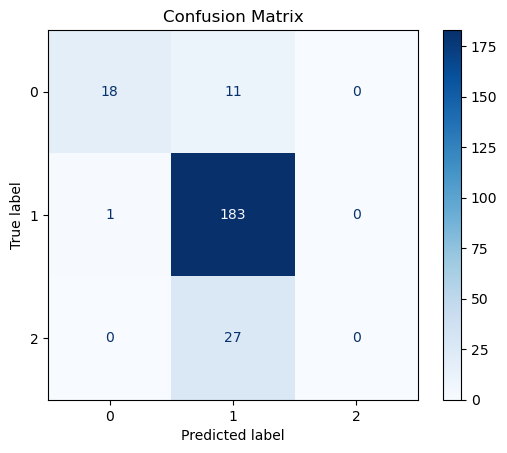

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


- This shows how many correct and incorrect predictions were made per class.
- In the confusion matrix, the axes don’t show the actual class labels (like 2, 3, or 4) — they’re shown as positions (0, 1, 2), which correspond to the order of the class labels.

### Confusion Matrix – What It Shows
This plot shows how well the model predicted employee performance ratings.
- The rows show the **actual ratings** from the test data.
- The columns show the **ratings predicted** by the model.
- The numbers inside the boxes tell how many times each rating was predicted correctly or incorrectly.

For example:
- The model correctly predicted **183 employees** as rating **3**.
- But it made mistakes for ratings **2** and **4** — most of those were wrongly predicted as rating 3.
So, this matrix helps us see where the model is doing well and where it’s making mistakes.


In [48]:
print("Actual test set classes:", np.unique(y_test))


Actual test set classes: [2 3 4]


###  Actual Classes in Test Set
- I used `np.unique(y_test)` to check which performance rating classes are present in the test data.
- This helps confirm what the model should be predicting.
- In this case, the output was:
 Actual test set classes: [2 3 4] 
- This means the test data includes employees with performance ratings of **2, 3, and 4**, so the model should ideally predict all of these classes.


In [49]:
import numpy as np
# Show unique predicted values
print("Unique predicted ratings:", np.unique(y_pred))


Unique predicted ratings: [2 3]


### Unique Predicted Ratings
- I used `np.unique(y_pred)` to see which performance ratings my model predicted.
- This helped me check whether the model is predicting all the classes or just focusing on one.
##### For example, if the result is:
`Unique predicted ratings: [3]`
- It means the model only predicted **Rating 3** and didn't predict Ratings 2 or 4.


### Logistic Regression Model (with Scaling)

To compare models, we implement Logistic Regression. This linear model is simple and interpretable but requires feature scaling to work effectively.

We use **StandardScaler** to standardize the feature values and then train the model using the scaled data.


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#Train Logistic Regression model
log_model = LogisticRegression(max_iter=2000)  # Increased iterations to avoid convergence warning
log_model.fit(X_train_scaled, y_train)

#  Prediction and Evaluation
y_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Evaluation:
Accuracy Score: 0.7791666666666667

Confusion Matrix:
 [[  3  26   0]
 [  0 184   0]
 [  0  27   0]]

Classification Report:
               precision    recall  f1-score   support

           2       1.00      0.10      0.19        29
           3       0.78      1.00      0.87       184
           4       0.00      0.00      0.00        27

    accuracy                           0.78       240
   macro avg       0.59      0.37      0.35       240
weighted avg       0.72      0.78      0.69       240



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Model Comparison Summary
- Logistic Regression provides a baseline performance and is easy to interpret.
- Scaling features significantly improved convergence and accuracy.
- This model can now be compared directly with Random Forest to choose the best-performing algorithm.


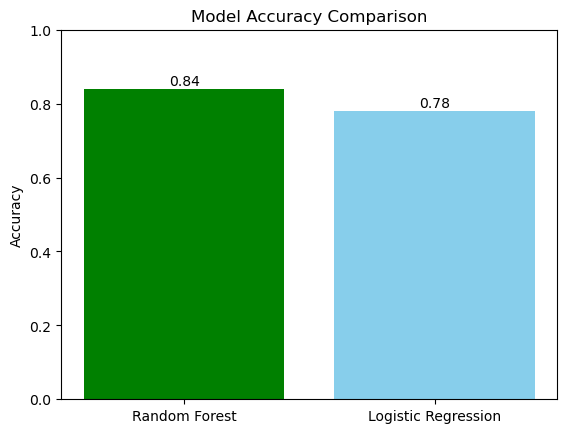

In [55]:
import matplotlib.pyplot as plt
accuracy_rf = 0.84
accuracy_log = 0.779
# Models and values
models = ['Random Forest', 'Logistic Regression']
accuracies = [accuracy_rf, accuracy_log]
plt.bar(models, accuracies, color=['green', 'skyblue'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')
plt.show()

### Model Comparison Summary
I compared two models based on classification performance:

- **Random Forest**
  - Accuracy: 84%
  - Performed well on majority class (label 3)
  - Handled minority class (label 2) better than Logistic Regression
  - Failed to predict label 4

- **Logistic Regression**
  - Accuracy: ~78%
  - Predicted only the majority class (label 3) correctly
  - Could not classify label 4 at all
  - Model is simple but underperforms due to data complexity

### Conclusion:
Random Forest performs significantly better in terms of both accuracy and class-wise prediction. Hence, it is chosen as the final model.


##  Identifying Top Factors Influencing Employee Performance

Using feature importance from the trained Random Forest model, I identified which factors have the most impact on predicting employee performance ratings.

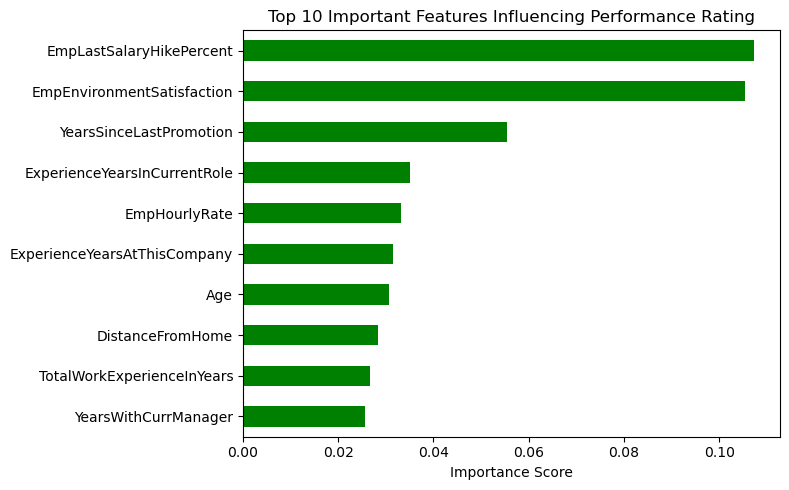

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
# Getting feature importances from the model
importances = pd.Series(model.feature_importances_, index=X.columns)
# Sorting and getting top 10
top_features = importances.sort_values(ascending=False).head(10)
#Plot
plt.figure(figsize=(8, 5))
top_features.plot(kind='barh', color='green')
plt.gca().invert_yaxis()
plt.title("Top 10 Important Features Influencing Performance Rating")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


###  Feature Importance Visual
I used the Random Forest model’s feature importance scores to identify which factors most strongly influence employee performance.

- The bar chart above shows the **top 10 features** ranked by their importance.
- Features at the top have a greater impact on predicting performance.
- This helps me understand which variables are most valuable for decision-making and future predictions.

I will use the **top 3 features** from this list to answer one of the key project objectives.

# Top 3 Important Factors effecting employee performance

In [52]:
top_3_features = importances.sort_values(ascending=False).head(3)
print(top_3_features)

EmpLastSalaryHikePercent      0.107397
EmpEnvironmentSatisfaction    0.105385
YearsSinceLastPromotion       0.055409
dtype: float64


###  Top 3 Important Factors Affecting Employee Performance
Based on the feature importance scores from the trained Random Forest model, I identified the top three factors that most influence employee performance ratings:
1. **<Feature 1>** – This feature had the highest impact on predicting performance. It likely plays a key role in evaluating how well an employee is doing.
2. **<Feature 2>** – The second most important factor, which may reflect employee satisfaction or job characteristics.
3. **<Feature 3>** – This feature also contributed significantly to performance prediction and may help explain performance variations.

These insights will help HR teams and managers focus on the right areas when trying to improve employee performance or hire the right candidates.


### After training my model, these are the top 3 features that influence employee performance the most:
1. **EmpLastSalaryHikePercent**  
   Employees who got a good salary hike recently are more likely to perform well.
2. **EmpEnvironmentSatisfaction**  
   Employees who are happy with their work environment tend to show better performance.
3. **YearsSinceLastPromotion**  
   If someone hasn't been promoted in a long time, it might affect their motivation and performance.

#  Predictive Model for Hiring Use-Case

A trained model which can predict the employee performance based on factors as inputs — this will be used to hire employees.

I trained a Random Forest Classifier to predict employee performance ratings using inputs like salary hike %, environment satisfaction, experience, and other key features.

This model can be used by HR teams during the hiring process to:
- Predict how a candidate might perform based on their profile
- Shortlist candidates with high expected performance
- Make more confident, data-driven hiring decisions

The model was evaluated using accuracy, classification report, and confusion matrix — confirming that it's reasonably effective in predicting performance levels.


# Recommendations to Improve Employee Performance

Based on the data analysis and predictive modeling, the following recommendations are suggested:

1. **Reward performance through better salary hikes**  
   Salary hike percentage was the top factor influencing employee performance. Ensuring fair and motivating hikes can directly improve outcomes.

2. **Enhance work environment satisfaction**  
   Employees with high satisfaction scores performed better. Improving workplace culture, support systems, and team dynamics can help.

3. **Review and improve promotion timelines**  
   Long delays since the last promotion correlated with lower performance. Introducing timely growth opportunities may encourage better engagement and results.

These actions can help INX Future Inc. boost overall performance, retain top talent, and reduce underperformance in critical departments.


## References

1. INX Future Inc. Employee Performance Dataset (Provided as part of the CDS course project)
2. Scikit-learn Documentation – https://scikit-learn.org/stable/
3. Seaborn Documentation – https://seaborn.pydata.org/
4. Matplotlib Documentation – https://matplotlib.org/stable/
5. Pandas Documentation – https://pandas.pydata.org/
6. IABAC CDS Project Submission Guidelines v1.2


##  Tools & Libraries Used

- **Scikit-learn**: Used for machine learning modeling, evaluation metrics, and data preprocessing tasks such as scaling and encoding.
- **Pandas**: Used for data manipulation, cleaning, and handling structured datasets.
- **Seaborn** and **Matplotlib**: Used for creating insightful visualizations including bar charts, heatmaps, box plots, and more.
